# importing libraries

In [59]:
import numpy as np
import pandas ass pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# importing dataset

In [88]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [60]:

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [61]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#Information about the dataset

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
#To know more about the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
#To know more about the dataset with transpose – here T is for the transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [65]:
# Now let’s check that if our dataset have null values or not

df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [66]:
# Now let’s check the number of null values our dataset has.

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here from the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process.

In [67]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [68]:
#Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


As mentioned above that now we will be replacing the zeros with the NAN values so that we can impute it later to maintain the authenticity of the dataset as well as trying to have a better Imputation approach i.e to apply mean values of each column to the null values of the respective columns

# Data Visualization

Plotting the data distribution plots before removing null values

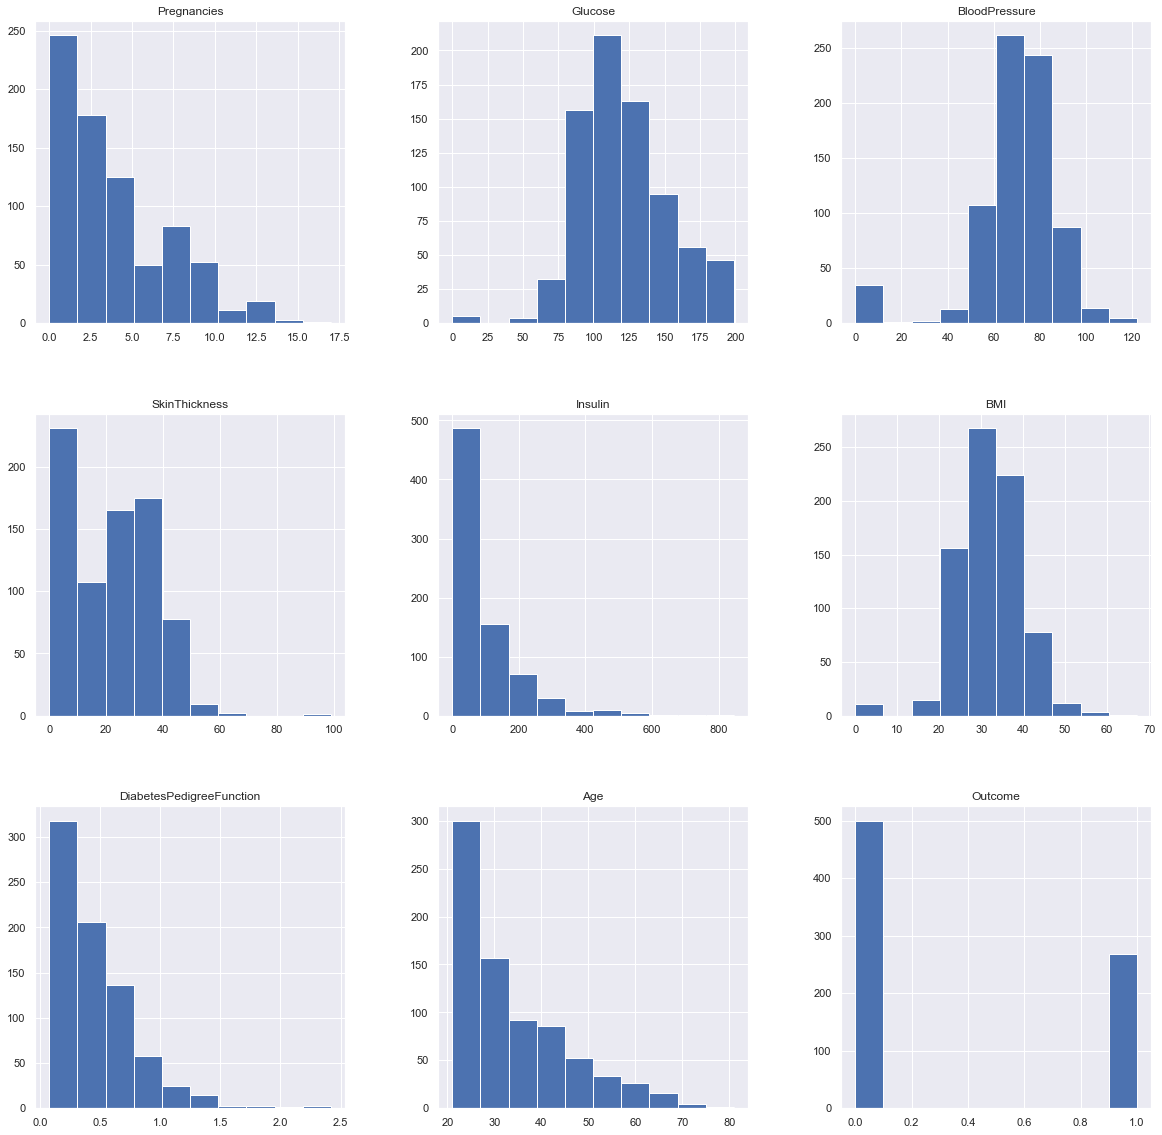

In [69]:
p = df.hist(figsize = (20,20))

Inference: So here we have seen the distribution of each features whether it is dependent data or independent data and one thing which could always strike that why do we need to see the distribution of data? So the answer is simple it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

Now we will be imputing the mean value of the column to each missing value of that particular column.

In [70]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

# Plotting the distributions after removing the NAN values.

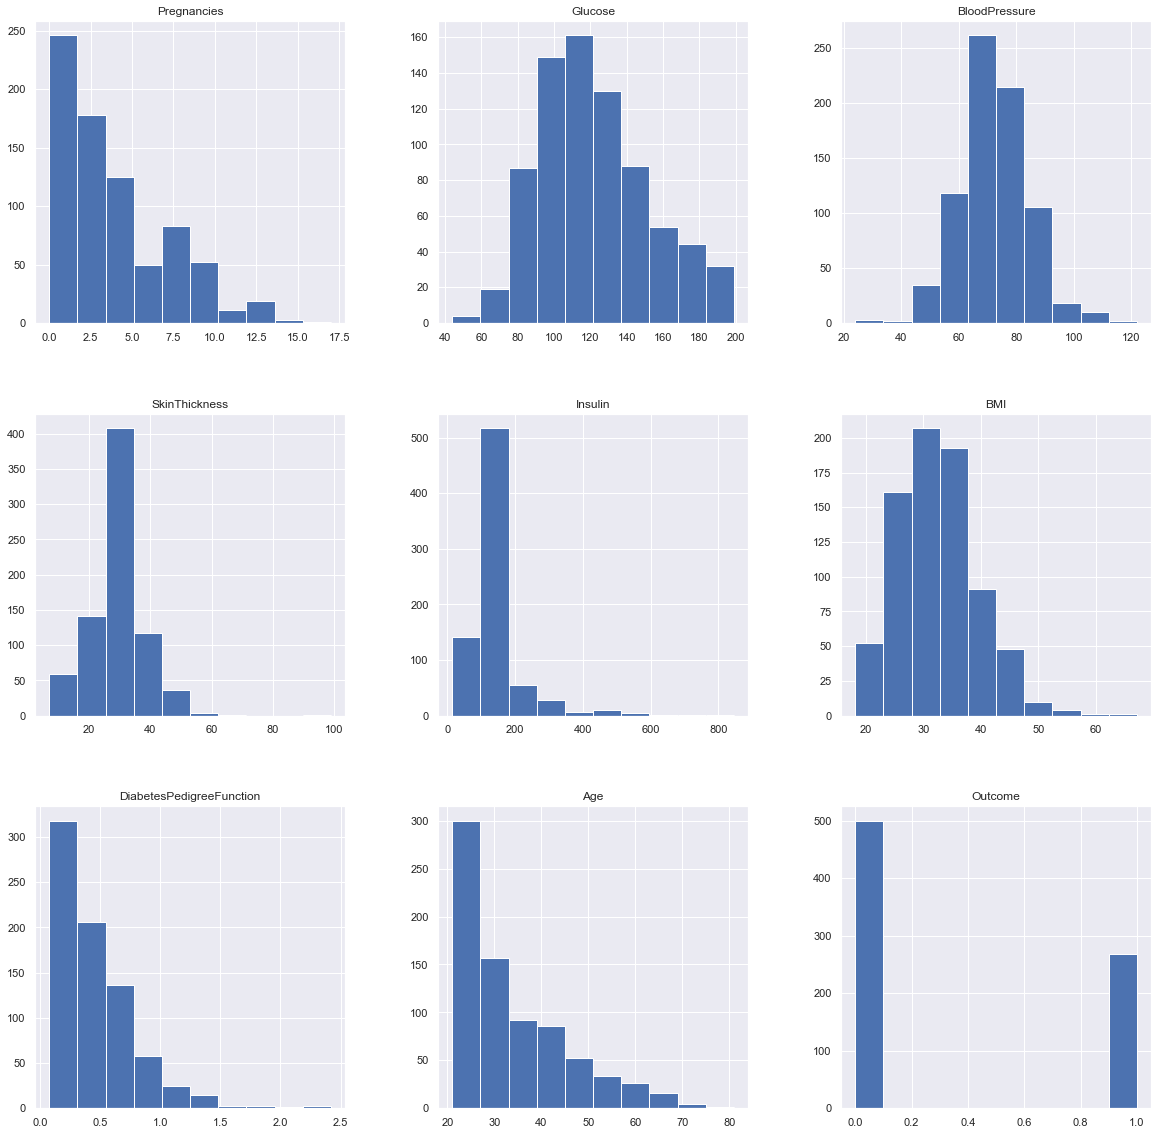

In [71]:
p = df_copy.hist(figsize = (20,20))

Inference: Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example – In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

# Plotting Null Count Analysis Plot

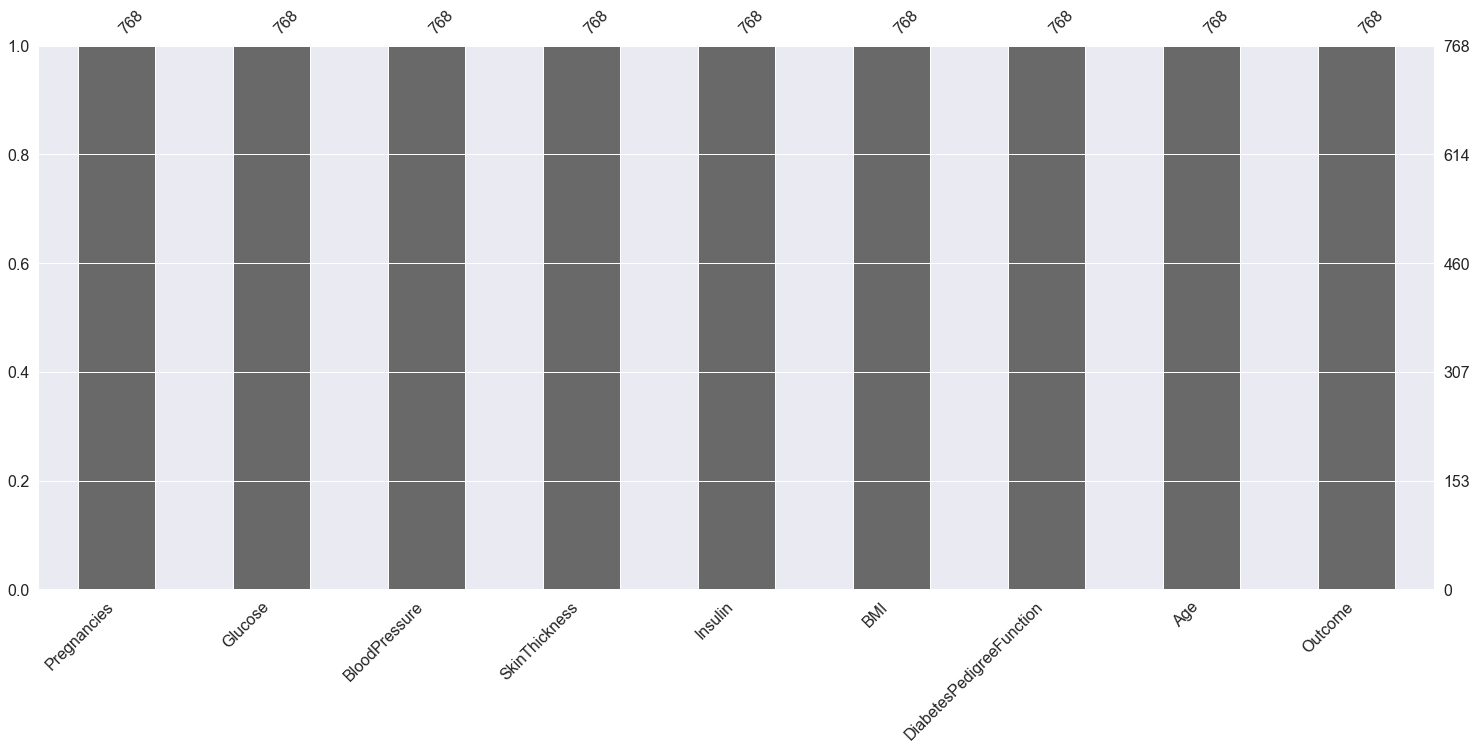

In [72]:
p = msno.bar(df)

Inference: Now in the above graph also we can clearly see that there are no null values in the dataset.

0    500
1    268
Name: Outcome, dtype: int64


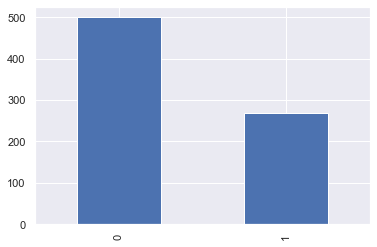

In [73]:
#Now, let’s check that how well our outcome column is balanced

color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

Inference: Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

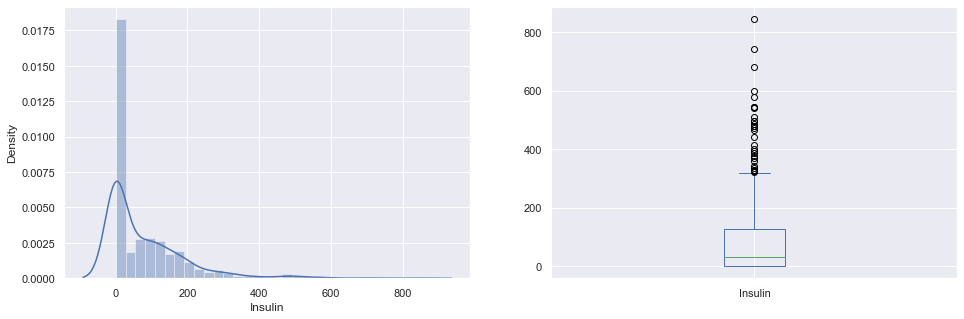

In [74]:
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

Inference: That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

# Correlation between all the features

Correlation between all the features before cleaning

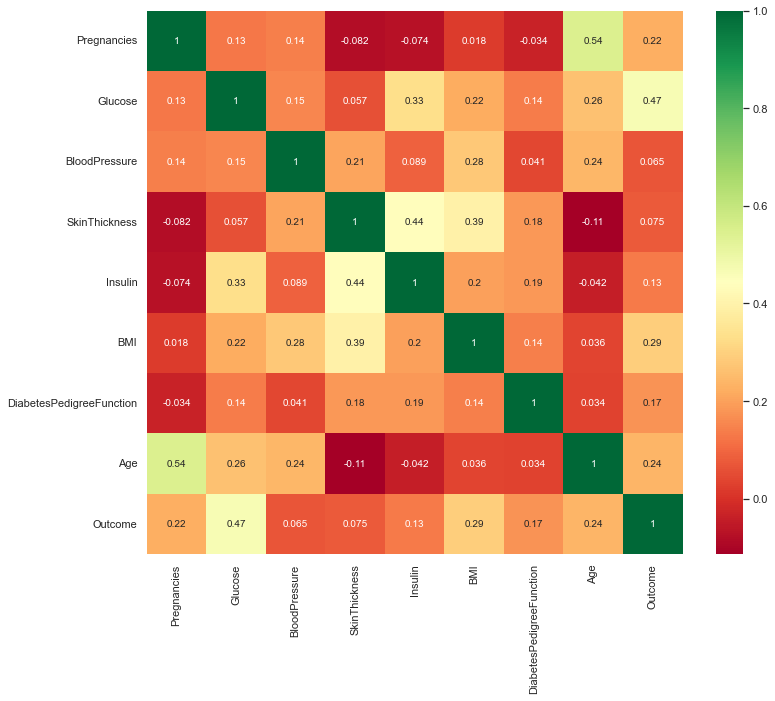

In [75]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

# Scaling the Data

In [76]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [77]:
#After Standard scaling

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


That’s how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result.

Let’s explore our target column

# Model Building

# Splitting the dataset

In [78]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#Now we will split the data into training and testing data using the train_test_split function

In [79]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

# Random Forest

# Building the model using RandomForest

In [80]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model let’s check the accuracy of the model on the training dataset.

In [81]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


So here we can see that on the training dataset our model is overfitted.

# Getting the accuracy score for Random Forest

In [82]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7677165354330708


# Decision Tree

Building the model using DecisionTree

# Getting the accuracy score for Decision Tree

In [84]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7165354330708661


Classification report and confusion matrix of the decision tree model

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[128  34]
 [ 38  54]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       162
           1       0.61      0.59      0.60        92

    accuracy                           0.72       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.71      0.72      0.72       254

